# Работа с Excel

Материалы:
* Макрушин С.В. Лекция 7: Работа с Excel
* https://docs.xlwings.org/en/stable/quickstart.html
* https://nbviewer.jupyter.org/github/pybokeh/jupyter_notebooks/blob/master/xlwings/Excel_Formatting.ipynb#search_text


## Задачи для совместного разбора

1. На листе "Рецептура" файла `себестоимостьА_в1.xlsx` для области "Пшеничный хлеб" рассчитать себестоимость всех видов продукции.

In [3]:
import xlwings as xw

In [7]:
wb = xw.Book('data/себестоимостьА_в1.xlsx')
bread = wb.sheets['Рецептура'].range('рцп_пшеничный_хлеб').value
res = {}


[['№',
  'Наименование продукции',
  'Вес, кг.',
  'Цена оптовая, руб.',
  'Цена розничная, руб.',
  'Физический расход ресурсов на единицу продукции',
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  'Доля'],
 [None,
  None,
  None,
  None,
  None,
  'Вода',
  'Пшеничная мука',
  'Дрожжи',
  'Сахар',
  'Соль',
  'Куркума молотая',
  'Топленное масло',
  'Кунжутные семена',
  'Масло оливковое',
  None,
  None,
  None,
  None],
 [None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None],
 [1.0,
  'Хлеб Венгерский',
  0.4,
  35.0,
  50.0,
  0.2,
  0.4,
  0.02,
  0.02,
  0.01,
  0.005,
  0.1,
  None,
  None,
  None,
  None,
  None,
  0.3],
 [2.0,
  'Хлеб "Барбари"',
  0.25,
  28.0,
  40.0,
  0.07,
  0.25,
  0.01,
  0.06,
  0.015,
  None,
  0.06,
  0.05,
  None,
  None,
  None,
  None,
  0.2],
 [3.0,
  'Багет парижский',
  0.25,
  35.0,
  50.0,
  0.12,
  0.22,
  0.00

2. Результаты расчетов 1.1 сохранить в отдельном столбце области "Пшеничный хлеб"

3. Приблизить форматирование столбца, добавленного в задаче 2 к оформлению всей области.

4. Выполнить 3 с помощью "протягиваемых" формул.

## Лабораторная работа 7.1

1. Загрузите данные из файлов `reviews_sample.csv` (__ЛР2__) и `recipes_sample.csv` (__ЛР5__) в виде `pd.DataFrame`. Обратите внимание на корректное считывание столбца(ов) с индексами. Оставьте в таблице с рецептами следующие столбцы: `id`, `name`, `minutes`, `submitted`, `description`, `n_ingredients`

In [2]:
import pandas as pd

In [3]:
reviews = pd.read_csv('data/reviews_sample.csv', index_col = 0)
reviews


,user_id,recipe_id,date,rating,review
370476,21752,57993,2003-05-01,5,Last week whole sides of frozen salmon fillet ...
624300,431813,142201,2007-09-16,5,So simple and so tasty! I used a yellow capsi...
187037,400708,252013,2008-01-10,4,"Very nice breakfast HH, easy to make and yummy..."
706134,2001852463,404716,2017-12-11,5,These are a favorite for the holidays and so e...
312179,95810,129396,2008-03-14,5,Excellent soup! The tomato flavor is just gre...
...,...,...,...,...,...
1013457,1270706,335534,2009-05-17,4,This recipe was great! I made it last night. I...
158736,2282344,8701,2012-06-03,0,This recipe is outstanding. I followed the rec...
1059834,689540,222001,2008-04-08,5,"Well, we were not a crowd but it was a fabulou..."
453285,2000242659,354979,2015-06-02,5,I have been a steak eater and dedicated BBQ gr...


In [4]:
recipes = pd.read_csv('data/recipes_sample.csv', usecols = ['id', 'name', 'minutes', 'submitted', 'description', 'n_ingredients'])
recipes


,name,id,minutes,submitted,description,n_ingredients
0,george s at the cove black bean soup,44123,90,2002-10-25,an original recipe created by chef scott meska...,18.0
1,healthy for them yogurt popsicles,67664,10,2003-07-26,my children and their friends ask for my homem...,NaN
2,i can t believe it s spinach,38798,30,2002-08-29,"these were so go, it surprised even me.",8.0
3,italian gut busters,35173,45,2002-07-27,my sister-in-law made these for us at a family...,NaN
4,love is in the air beef fondue sauces,84797,25,2004-02-23,i think a fondue is a very romantic casual din...,NaN
...,...,...,...,...,...,...
29995,zurie s holey rustic olive and cheddar bread,267661,80,2007-11-25,this is based on a french recipe but i changed...,10.0
29996,zwetschgenkuchen bavarian plum cake,386977,240,2009-08-24,"this is a traditional fresh plum cake, thought...",11.0
29997,zwiebelkuchen southwest german onion cake,103312,75,2004-11-03,this is a traditional late summer early fall s...,NaN
29998,zydeco soup,486161,60,2012-08-29,this is a delicious soup that i originally fou...,NaN


2. Случайным образом выберите 5% строк из каждой таблицы и сохраните две таблицы на разные листы в один файл `recipes.xlsx`. Дайте листам названия "Рецепты" и "Отзывы", соответствующие содержанию таблиц. 

In [5]:
import random

random_recipes = recipes.sample(frac = 0.05)
random_reviews = reviews.sample(frac = 0.05)

In [ ]:
with pd.ExcelWriter('recipes.xlsx') as writer:
    random_recipes.to_excel(writer, sheet_name = 'Рецепты', index = False)
    random_reviews.to_excel(writer, sheet_name = 'Отзывы', index = False)

In [ ]:
import xlwings as xw

wb = xw.Book()

In [ ]:
wb.sheets[0].name = 'Рецепты'
wb.sheets.add(name = 'Отзывы', after = wb.sheets[0].name)

In [ ]:
wb.sheets['Рецепты'].range('A1').value = random_recipes
wb.sheets['Отзывы'].range('A1').value = random_reviews
wb.save('recipes2.xlsx')

3. Используя `xlwings`, добавьте на лист `Рецепты` столбец `seconds_assign`, показывающий время выполнения рецепта в секундах. Выполните задание при помощи присваивания массива значений диапазону ячеек.

In [9]:
import xlwings as xw

wb = xw.Book('recipes.xlsx')
random_recipes['seconds_assign'] = random_recipes['minutes'] * 60
seconds_assign = random_recipes['seconds_assign'].tolist()
wb.sheets['Рецепты'].range('G1').value = 'seconds_assign'
wb.sheets['Рецепты'].range('G2').options(transpose = True).value = seconds_assign

4. Используя `xlwings`, добавьте на лист `Рецепты` столбец `seconds_formula`, показывающий время выполнения рецепта в секундах. Выполните задание при помощи формул Excel.

In [36]:
xw.Range('G1').expand('down').address

'$G$1:$G$1501'

In [37]:
wb.sheets['Рецепты'].range('H1').value = 'seconds_formula'
xw.Range('H2:H1501').formula = f'=C2*60'

5. Сделайте названия всех добавленных столбцов полужирными и выровняйте по центру ячейки.

In [39]:
wb.sheets['Рецепты'].range('G1').expand('right').font.bold = True
wb.sheets['Рецепты'].range('G1').expand('right').api.HorizontalAlignment = xw.constants.HAlign.xlHAlignCenter

6. Раскрасьте ячейки столбца `minutes` в соответствии со следующим правилом: если рецепт выполняется быстрее 5 минут, то цвет - зеленый; от 5 до 10 минут - жёлтый; и больше 10 - красный.

In [54]:
wb.sheets[0].activate()
for time in xw.Range('C2:C1501'):
    if time.value < 5:
        time.color = (79, 224, 122) # зеленый (оттенок)
    elif time.value <= 10:
        time.color = (253, 249, 164) # желтый (оттенок)
    else: 
        time.color = (244, 55, 85) # красный (оттенок)

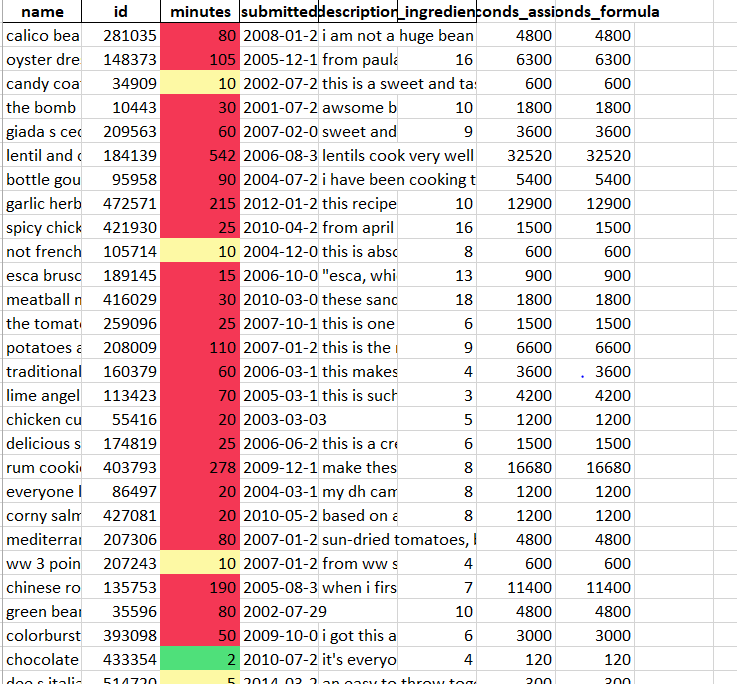

7. Добавьте на лист `Рецепты`  столбец `n_reviews`, содержащий кол-во отзывов для этого рецепта. Выполните задание при помощи формул Excel.

In [62]:
wb.sheets[0].activate()
xw.Range('I1').value = 'n_reviews'
xw.Range('I1').font.bold = True
xw.Range('I1').api.HorizontalAlignment = xw.constants.HAlign.xlHAlignCenter


In [ ]:
wb.sheets['Отзывы'].activate()
xw.Range('F2:F6336').formula = f'=COUNTIF(B:B; B2)'

wb.sheets['Рецепты'].activate()
xw.Range('I2:I1501').formula = f'=ВПР(B2;Отзывы!B:H;7;0)'
wb.sheets['Отзывы'].range('F2').expand('down').clear() 

## Лабораторная работа 7.2

8. Напишите функцию `validate()`, которая проверяет соответствие всех строк из листа `Отзывы` следующим правилам:
    * Рейтинг - это число от 0 до 5 включительно
    * Соответствующий рецепт имеется на листе `Рецепты`
    
В случае несоответствия этим правилам, выделите строку красным цветом

In [10]:
def validate():
    wb.sheets[1].activate()
    listt = [j for j in random_recipes['id']]
    for i in xw.Range('A2').expand().rows:
        if 0 <= i.value[3] <= 5:
            if i.value[1] in listt:
                pass
            else:
                i.color = (244, 55, 85)
        else:
            i.color = (244, 55, 85)

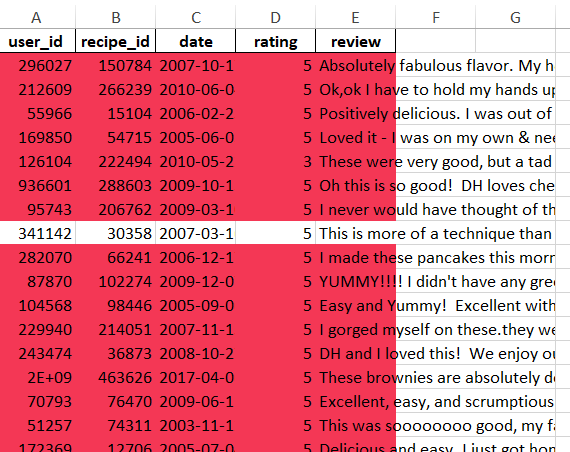

9. В файле `recipes_model.csv` находится модель данных предметной области "рецепты". При помощи пакета `csv` считайте эти данные. При помощи пакета `xlwings` запишите данные на лист `Модель` книги `recipes_model.xlsx`, начиная с ячейки `A2`, не используя циклы. Сделайте скриншот текущего состояния листа и прикрепите в ячейку ноутбука. 

In [20]:
import csv

recipes_model = []
with open('data/recipes_model.csv', 'r', encoding='utf-8') as file:
    reader = csv.reader(file, delimiter = '\t')
    for row in reader:
        recipes_model.append(row)

wb2 = xw.Book()
wb2.sheets[0].name = 'Модель'
xw.Range('A2').value = recipes_model
wb2.save('recipes_model.xlsx')

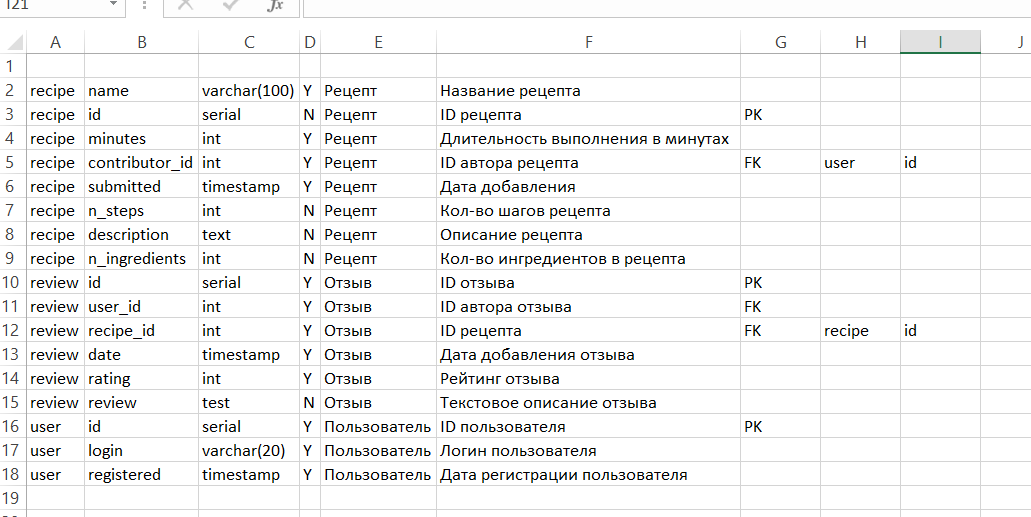

10. При помощи пакета `xlwings` добавьте в столбец J формулу для описания столбца на языке SQL. Формула должна реализовывать следующую логику:

    1\. в начале строки идут значения из столбцов В и C (значение столбца С приведено к верхнему регистру), разделенные пробелом
    
    2\. далее идут слова на основе столбца "Ключ"
        2.1 если в столбце "Ключ" указано значение "PK", то дальше через пробел идет ключевое слово "PRIMARY KEY"
        2.2 если в столбце "Ключ" указано значение "FK", то дальше через пробел идет ключевое слово "REFERENCES", затем значения столбцов H и I в формате "название_таблицы(название_столбца)"
        
    3\. если в столбце "Обязательно к заполнению" указано значение "Y" и в столбце "Ключ" указано не "PK", то дальше через пробел идет ключевое слово "NOT NULL".

Заполните этой формулой необходимое количество строк, используя "протягивание". Количество строк для протягивания определите на основе данных.

Сделайте скриншот текущего состояния листа и прикрепите в ячейку ноутбука.

11. При помощи пакета `xlwings` измените стилизацию листа `Модель`.
* для заголовков добавьте заливку цвета `00ccff`
* примените автоподбор ширины столбца;
* сделайте шрифт заголовков полужирным;
* добавьте таблице автофильтр.

Сделайте скриншот текущего состояния листа и прикрепите в ячейку ноутбука.

In [35]:
xw.Range('A2').expand('down').color = (0, 204, 255)
xw.Range('A2').expand().columns.autofit()
xw.Range('A2').expand('down').font.bold = True
xw.Range('A2').expand().api.AutoFilter(Field:=1)

True

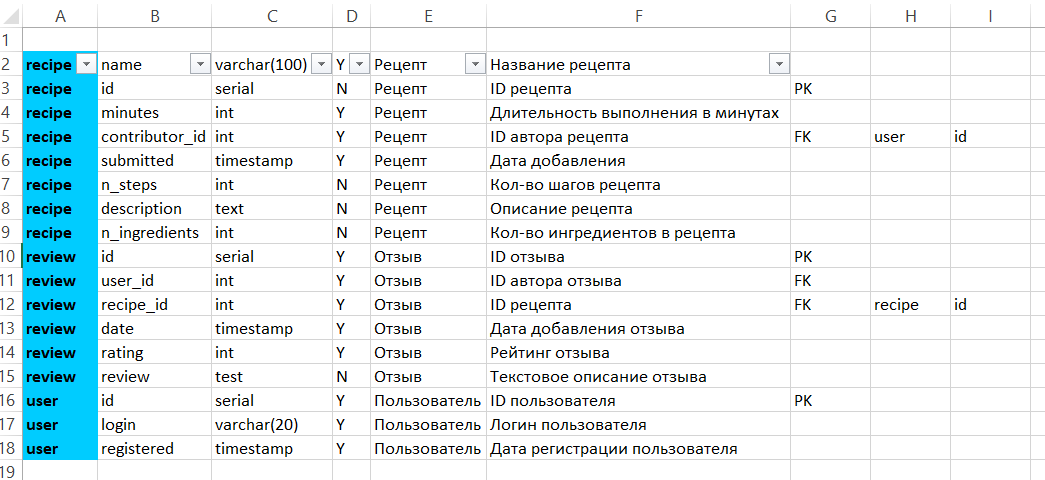

12. Посчитайте количество атрибутов для каждой из сущностей. Создайте лист `Статистика` и запишите в него результат группировки, начиная с ячейки "А1". Визуализируйте полученный результат при помощи столбчатой диаграммы. Сохраните полученную визуализацию на лист `Статистика`, начиная с ячейки "E2".  Сделайте скриншот листа `Статистика` и прикрепите в ячейку ноутбука.

* Вы можете воспользоваться методами для визуализации, которые поставляются вместе с объектами `pandas` (см. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot) 